In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

from sklearn.datasets import load_iris


In [2]:
data=load_iris()

In [3]:
values=data.data

In [4]:
columns=data.feature_names

In [5]:
target=data.target

In [6]:
df=pd.DataFrame(values, columns=columns)

In [7]:
df['target'] = target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df = df.sample(frac=1)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
88,5.6,3.0,4.1,1.3,1
36,5.5,3.5,1.3,0.2,0
130,7.4,2.8,6.1,1.9,2
75,6.6,3.0,4.4,1.4,1
40,5.0,3.5,1.3,0.3,0


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [12]:
xtrain

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
31,5.4,3.4,1.5,0.4
117,7.7,3.8,6.7,2.2
94,5.6,2.7,4.2,1.3
98,5.1,2.5,3.0,1.1
...,...,...,...,...
35,5.0,3.2,1.2,0.2
44,5.1,3.8,1.9,0.4
79,5.7,2.6,3.5,1.0
11,4.8,3.4,1.6,0.2


In [13]:
ytrain

114    2
31     0
117    2
94     1
98     1
      ..
35     0
44     0
79     1
11     0
4      0
Name: target, Length: 120, dtype: int32

In [20]:
model=Sequential()
model.add(Dense(32,input_dim=4,activation='relu'))
model.add(Dense(16 ,activation='relu'))
model.add(Dense(8 ,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(xtrain,ytrain,epochs=50,validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 0s 134ms/step - loss: 1.1257 - accuracy: 0.2708 - val_loss: 1.0528 - val_accuracy: 0.6250
Epoch 2/50
3/3 [==============================] - 0s 13ms/step - loss: 1.0322 - accuracy: 0.6250 - val_loss: 0.9975 - val_accuracy: 0.6250
Epoch 3/50
3/3 [==============================] - 0s 12ms/step - loss: 0.9812 - accuracy: 0.6562 - val_loss: 0.9526 - val_accuracy: 0.6250
Epoch 4/50
3/3 [==============================] - 0s 12ms/step - loss: 0.9404 - accuracy: 0.6458 - val_loss: 0.9120 - val_accuracy: 0.6250
Epoch 5/50
3/3 [==============================] - 0s 13ms/step - loss: 0.9044 - accuracy: 0.6562 - val_loss: 0.8735 - val_accuracy: 0.7083
Epoch 6/50
3/3 [==============================] - 0s 12ms/step - loss: 0.8702 - accuracy: 0.6354 - val_loss: 0.8409 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 11ms/step - loss: 0.8387 - accuracy: 0.6875 - val_loss: 0.8104 - val_accuracy: 0.7500
Epoch 8/50
3/3 [==========

In [23]:
yprob=model.predict(xtest)
yprob

array([[9.5759022e-01, 3.9962701e-02, 2.4471281e-03],
       [2.9967394e-02, 6.7454362e-01, 2.9548901e-01],
       [1.6382795e-03, 2.7928662e-01, 7.1907502e-01],
       [9.2386580e-01, 7.0713229e-02, 5.4210359e-03],
       [2.8479227e-03, 3.4709150e-01, 6.5006059e-01],
       [1.2802066e-03, 2.2036609e-01, 7.7835369e-01],
       [4.5349639e-02, 5.9539813e-01, 3.5925221e-01],
       [4.9666669e-03, 3.9280525e-01, 6.0222811e-01],
       [1.3778510e-02, 5.0278586e-01, 4.8343566e-01],
       [8.7656750e-04, 2.1303797e-01, 7.8608549e-01],
       [9.6542593e-03, 4.5002580e-01, 5.4031992e-01],
       [1.4842089e-02, 4.8638070e-01, 4.9877724e-01],
       [1.3955607e-03, 2.7918440e-01, 7.1942002e-01],
       [7.8658378e-03, 4.2990759e-01, 5.6222653e-01],
       [3.5065427e-02, 6.3386464e-01, 3.3106992e-01],
       [1.2859651e-03, 2.2276755e-01, 7.7594644e-01],
       [8.9677507e-01, 9.4855569e-02, 8.3693787e-03],
       [3.3040412e-03, 3.2042801e-01, 6.7626798e-01],
       [8.9977989e-03, 4.442

In [24]:
ypred=yprob.argmax(axis=1)

In [25]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
print(accuracy_score(ytest,ypred))
# print(recall_score(ytest,ypred))

0.8666666666666667


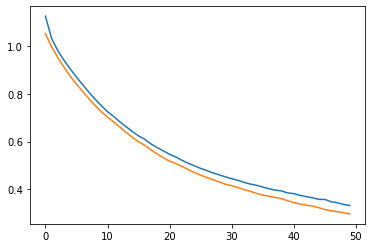

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

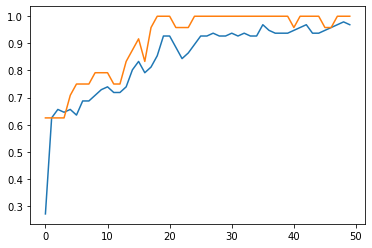

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [28]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytest.tolist(), ypred.tolist(), average='macro')

(0.9259259259259259, 0.8333333333333334, 0.8472222222222222, None)

In [29]:
confusion_matrix(ytest,ypred)

array([[ 8,  0,  0],
       [ 0,  4,  4],
       [ 0,  0, 14]], dtype=int64)